In [1]:
import os
import numpy as np
import xarray as xr
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

import geoviews_tools as gt

gv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:

ntime = 48
cscratch_path = os.path.join('/', 'global', 'cscratch1', 'sd', 'twhilton')
LHctl_d03 = gt.yatir_to_xarray(os.path.join(cscratch_path, 'LH_d03_yatirZ50.nc'),
                               varname='LH',
                               groupname='ctl',
                               timerange=ntime)
LHytr_d03 = gt.yatir_to_xarray(os.path.join(cscratch_path, 'LH_d03_yatirZ50.nc'),
                               varname='LH',
                               groupname='yatirZ050',
                               timerange=ntime)
LHctl_d02 = gt.yatir_to_xarray(os.path.join(cscratch_path, 'LH_d02_yatirZ50.nc'),
                               varname='LH',
                               groupname='ctl',
                               timerange=ntime)
LHytr_d02 = gt.yatir_to_xarray(os.path.join(cscratch_path, 'LH_d02_yatirZ50.nc'),
                               varname='LH',
                               groupname='yatirZ050',
                               timerange=ntime)

In [3]:
pad03 = 0.1
pad02 = 1.0
lon_d03 = LHctl_d03.lon.values
lat_d03 = LHctl_d03.lat.values
lon_d02 = LHctl_d02.lon.values
lat_d02 = LHctl_d02.lat.values

Plot the data using GeoViews with matplotlib.  The plot shows up (correctly) in the area surrounding [Yatir Forest](https://en.wikipedia.org/wiki/Yatir_Forest).

In [4]:
def draw_map(data_d02, data_d03, groupname=''):
    map_d02 = hv.Overlay((gf.land.options(scale='50m'),
                         gf.coastline.options(scale='50m'),
                         gf.borders.options(scale='50m'),
                         gv.Dataset(LHytr_d02).to(gv.QuadMesh,
                                                  groupby='time').opts(
                             xlim=(lat_d02.min() - pad02, 
                                   lat_d02.max() + pad02), 
                             ylim=(lon_d02.min() - pad02, 
                                   lon_d02.max() + pad02)),
                         hv.Bounds((lat_d03.min(), 
                                    lon_d03.min(), 
                                    lat_d03.max(), 
                                    lon_d03.max())).opts(color='blue')),
                         group=groupname,
                         label='d02')
    map_d03 = hv.Overlay((gf.land.options(scale='50m'), 
                          gf.ocean.options(scale='50m'),
                          gf.coastline.options(scale='50m'),
                          gf.borders.options(scale='50m'),
                          gv.Dataset(LHytr_d03, 
                                     group=groupname, 
                                     label='d03').to(gv.QuadMesh, 
                                                     groupby='time').opts(
                              xlim=(lat_d03.min() - pad03, 
                                    lat_d03.max() + pad03), 
                              ylim=(lon_d03.min() - pad03, 
                                    lon_d03.max() + pad03)),
                          hv.Bounds((lat_d03.min(), 
                                     lon_d03.min(), 
                                     lat_d03.max(), 
                                     lon_d03.max())).opts(color='blue')),
                         group=groupname,
                         label='d03')
    return(map_d02, map_d03)

In [5]:
hv.output(max_frames=ntime)
map_LH_ytr_d02, map_LH_ytr_d03 = draw_map(LHytr_d02, LHytr_d03, groupname='Yatir')
map_LH_ctl_d02, map_LH_ctl_d03 = draw_map(LHctl_d02, LHytr_d03, groupname='control')

In [6]:
LHmaps = hv.Layout((map_LH_ctl_d02.collate(), 
                    map_LH_ytr_d02.collate(), 
                    map_LH_ctl_d03.collate(), 
                    map_LH_ytr_d03.collate()),
                  label='LH (Wm$^{-2}$)').cols(2)

:Layout
   .HoloMap.I   :HoloMap   [time]
      :Overlay
         .Land.I      :Feature   [Longitude,Latitude]
         .Coastline.I :Feature   [Longitude,Latitude]
         .Borders.I   :Feature   [Longitude,Latitude]
         .QuadMesh.I  :QuadMesh   [lat,lon]   (LH)
         .Bounds.I    :Bounds   [x,y]
   .HoloMap.II  :HoloMap   [time]
      :Overlay
         .Land.I      :Feature   [Longitude,Latitude]
         .Coastline.I :Feature   [Longitude,Latitude]
         .Borders.I   :Feature   [Longitude,Latitude]
         .QuadMesh.I  :QuadMesh   [lat,lon]   (LH)
         .Bounds.I    :Bounds   [x,y]
   .HoloMap.III :HoloMap   [time]
      :Overlay
         .Land.I      :Feature   [Longitude,Latitude]
         .Ocean.I     :Feature   [Longitude,Latitude]
         .Coastline.I :Feature   [Longitude,Latitude]
         .Borders.I   :Feature   [Longitude,Latitude]
         .Control.D03 :QuadMesh   [lat,lon]   (LH)
         .Bounds.I    :Bounds   [x,y]
   .HoloMap.IV  :HoloMap   [time]
      :Overlay
         .Land.I      :Feature   [Longitude,Latitude]
         .Ocean.I     :Feature   [Longitude,Latitude]
         .Coastline.I :Feature   [Longitude,Latitude]
         .Borders.I   :Feature   [Longitude,Latitude]
         .Yatir.D03   :QuadMesh   [lat,lon]   (LH)
         .Bounds.I    :Bounds   [x,y]
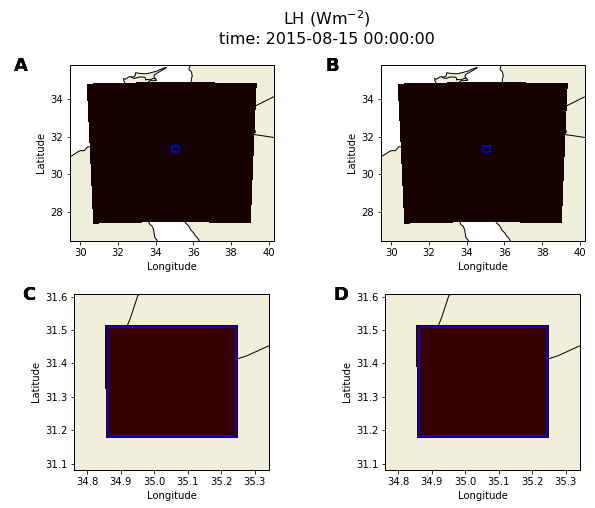
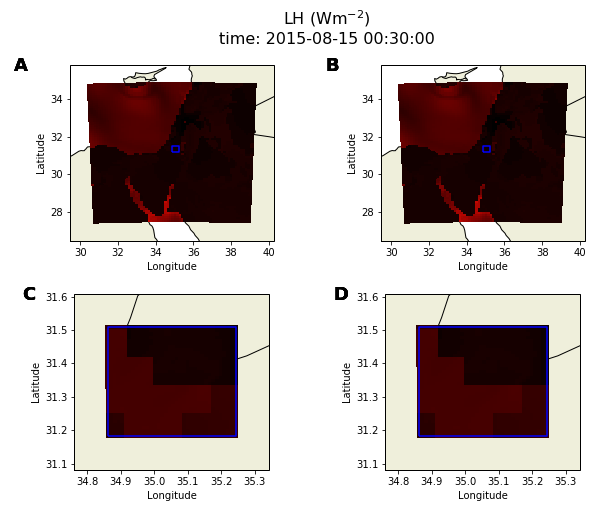
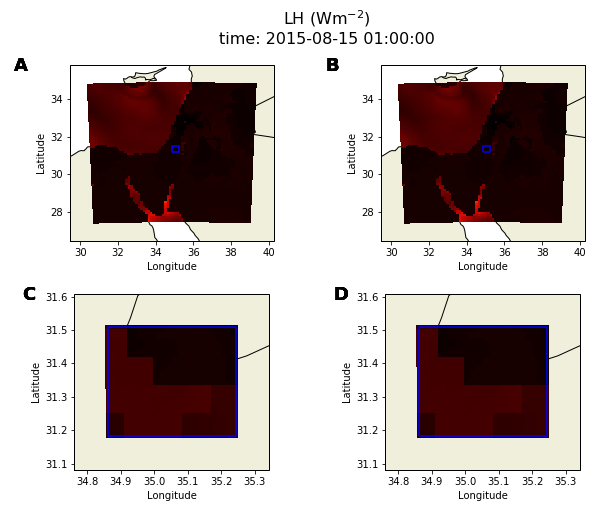
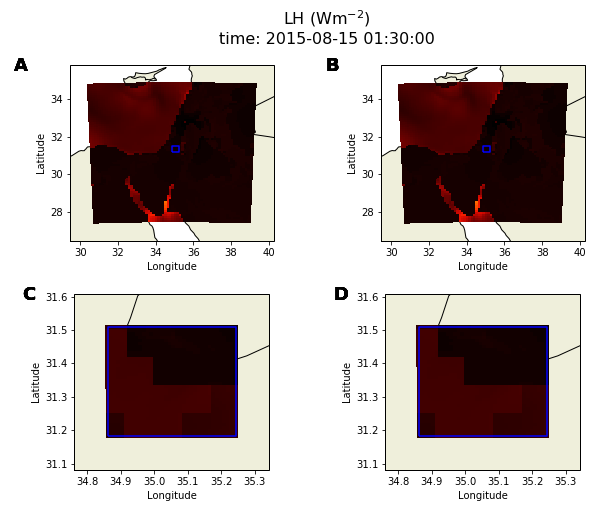
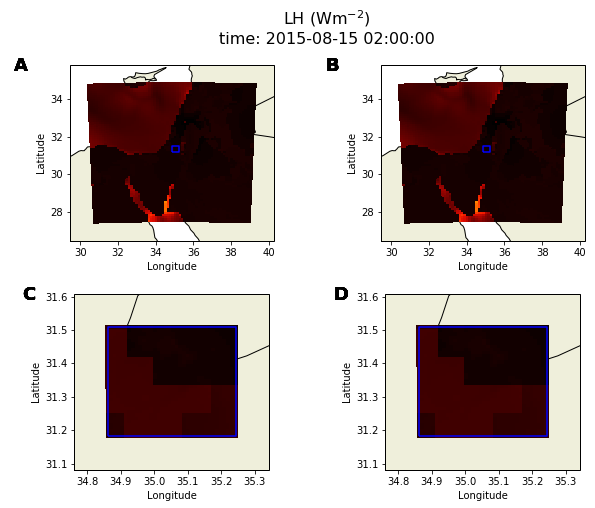
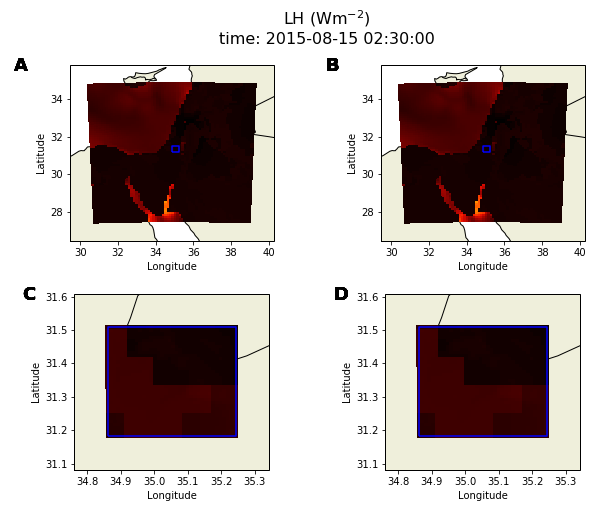
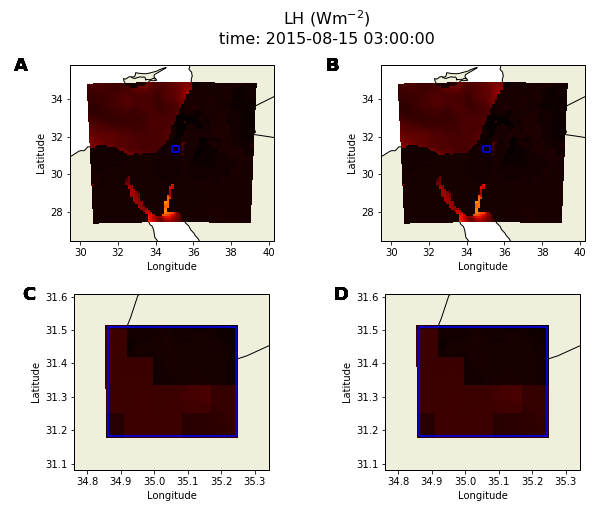
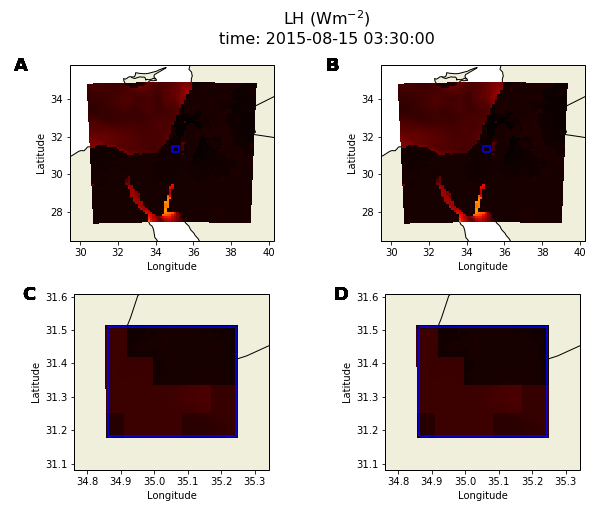
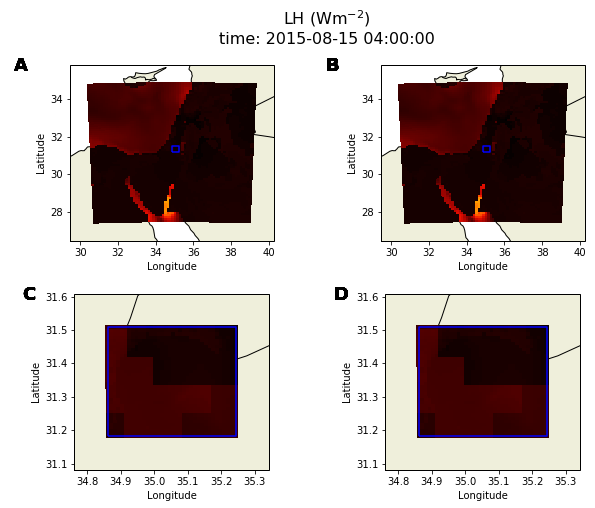
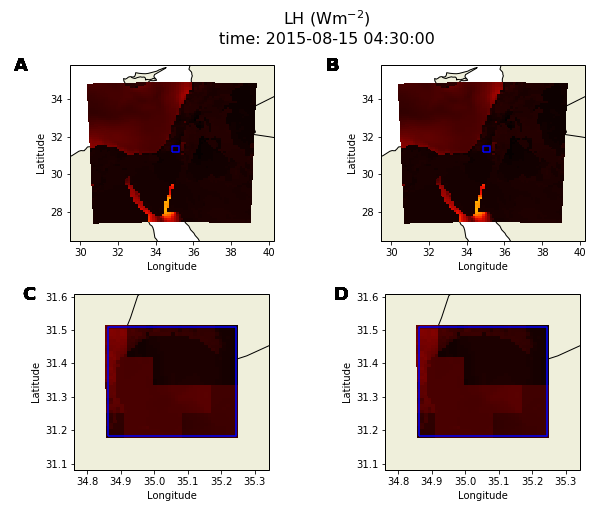
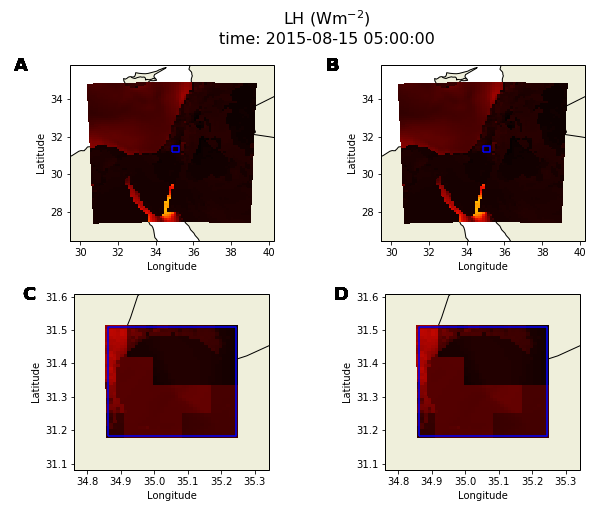
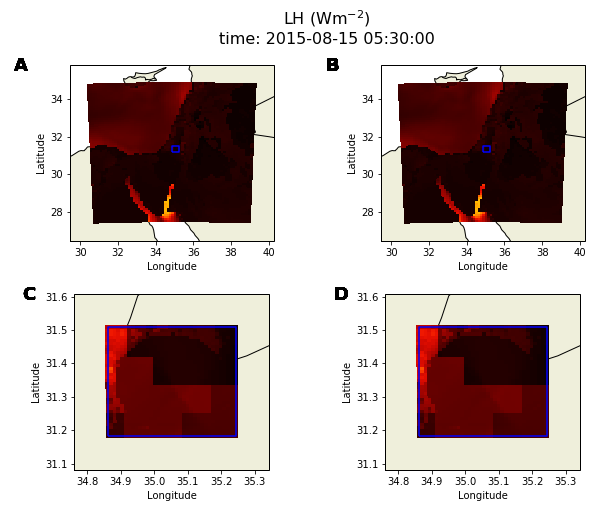
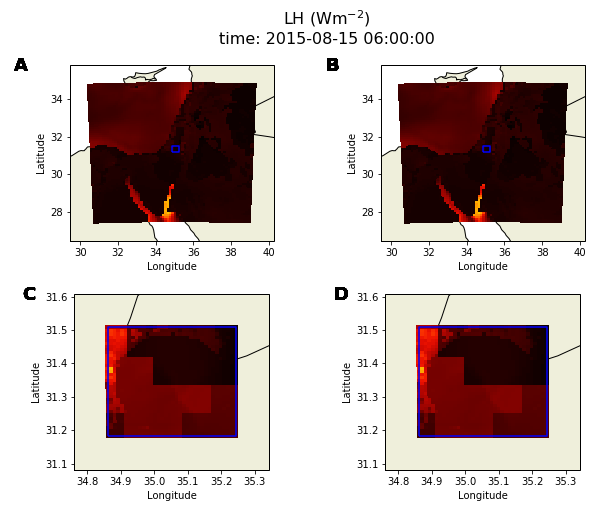
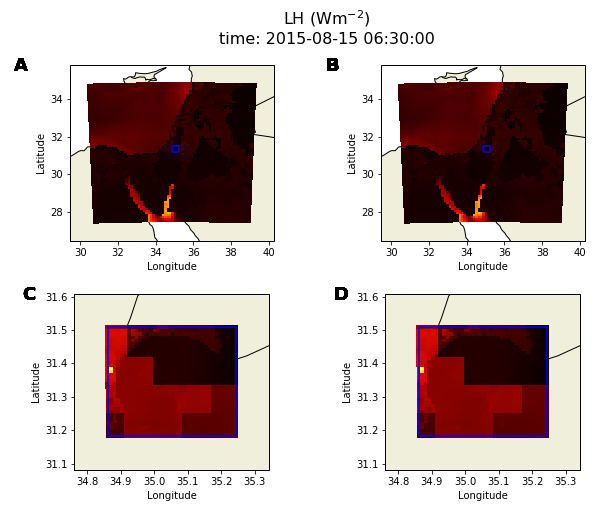
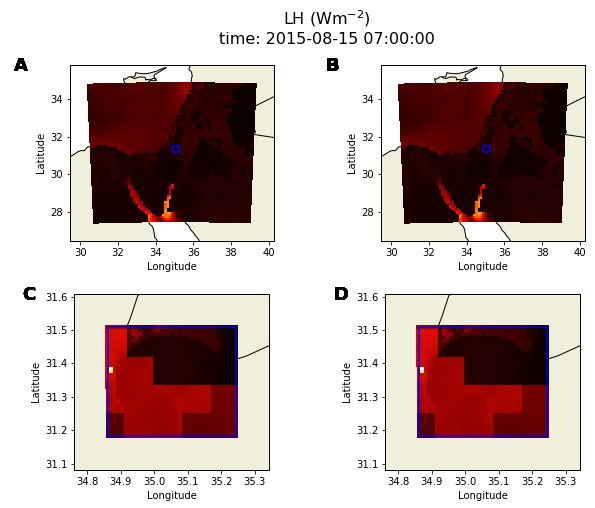
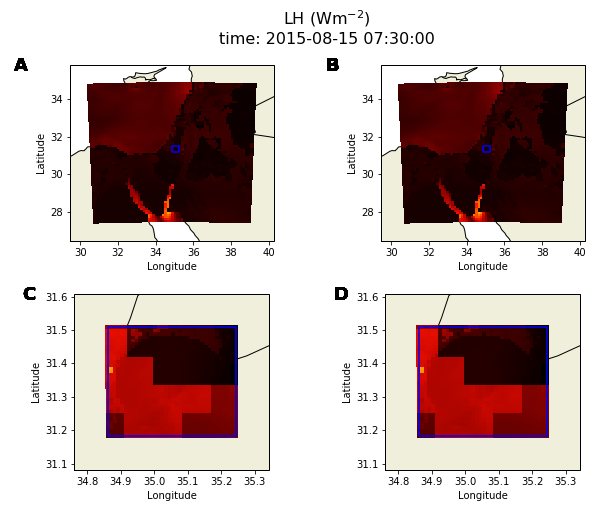
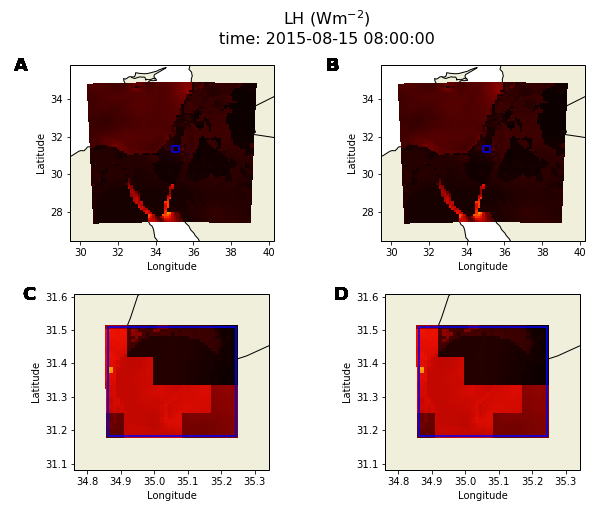
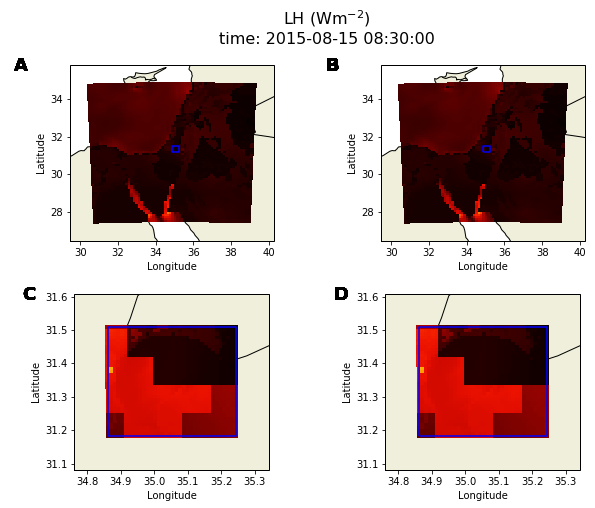
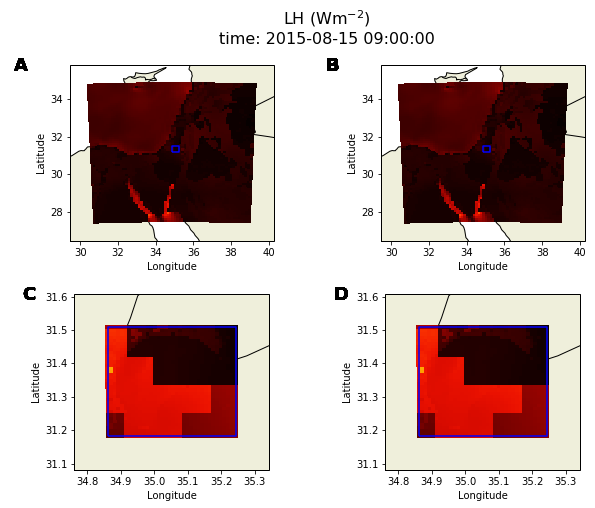
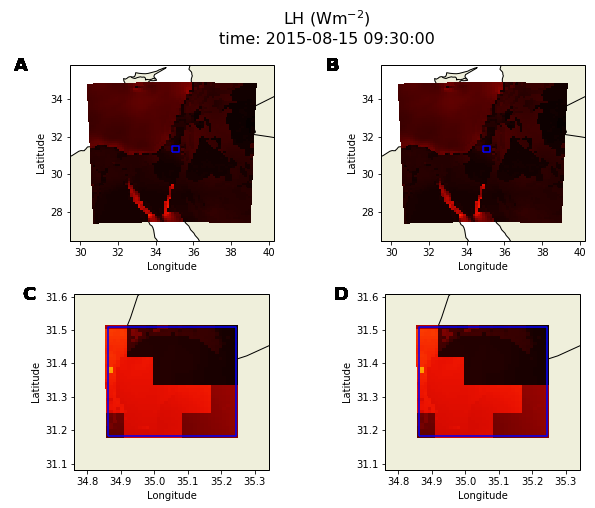
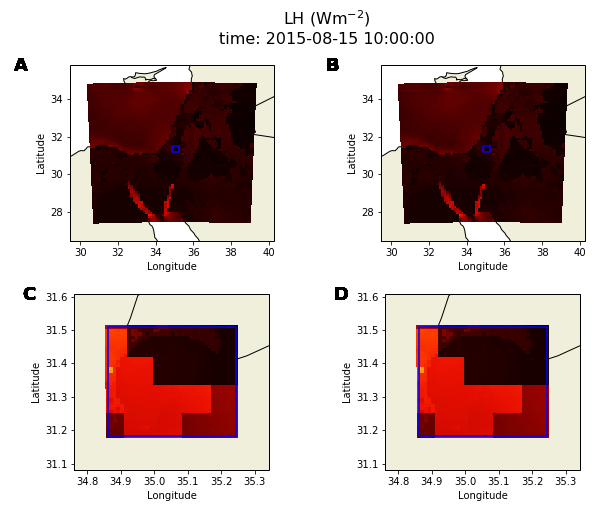
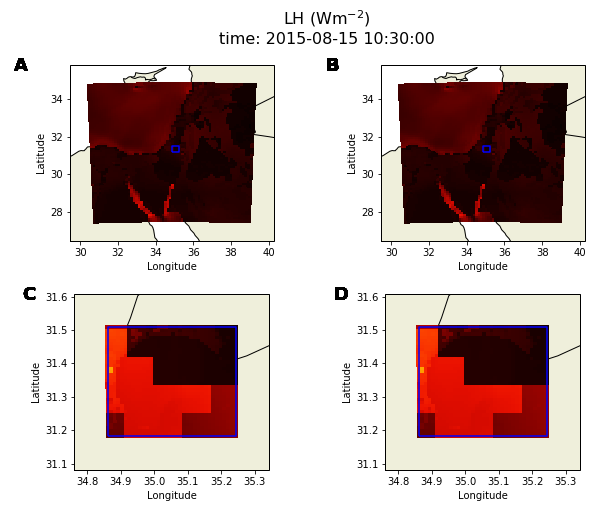
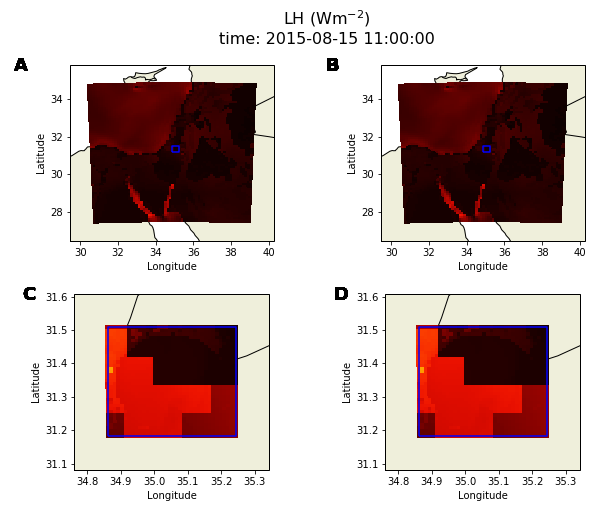
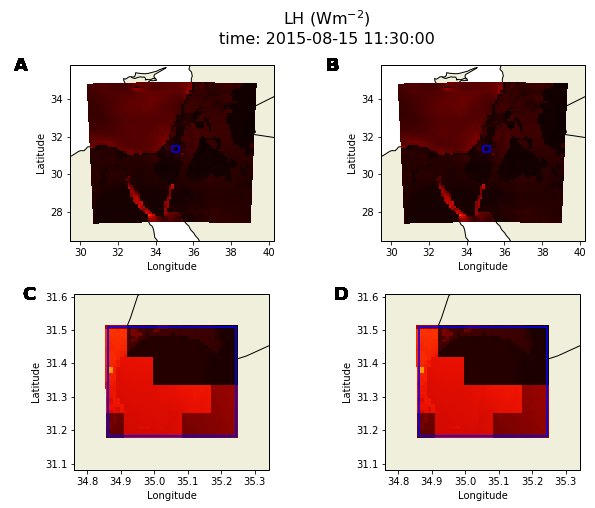
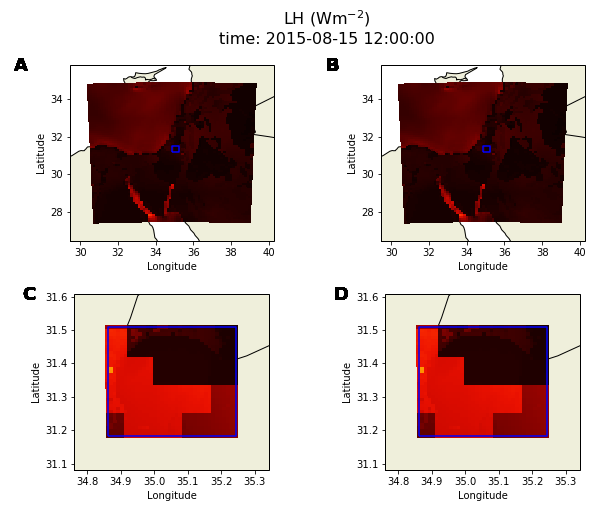
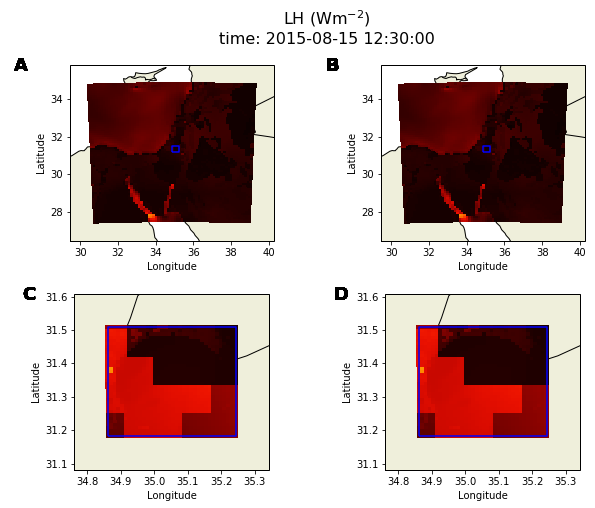
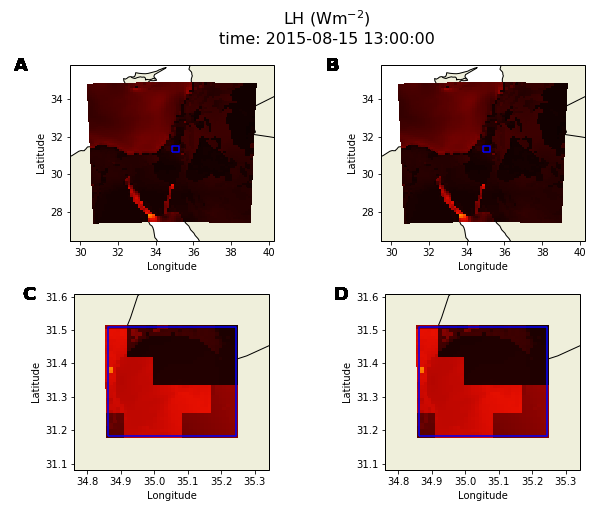
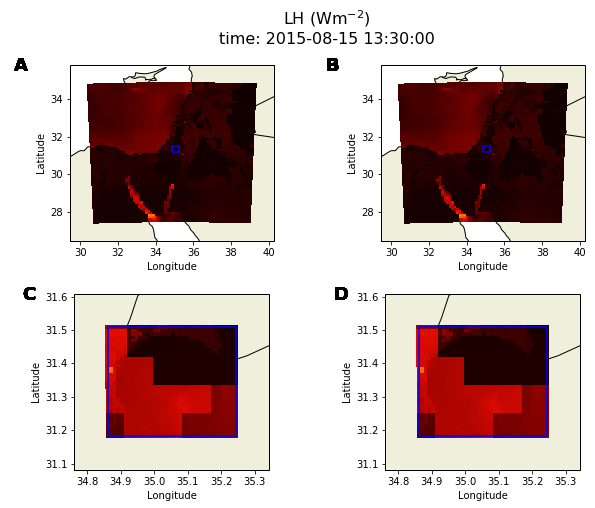
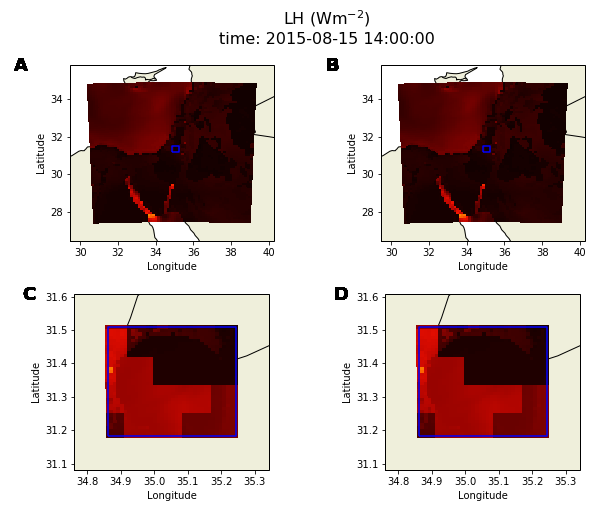
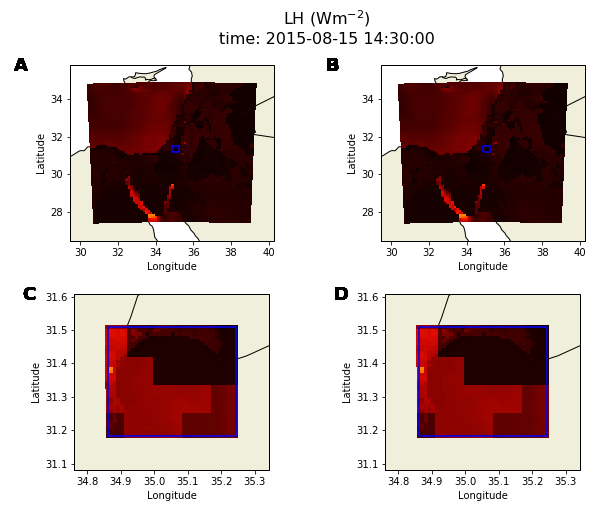
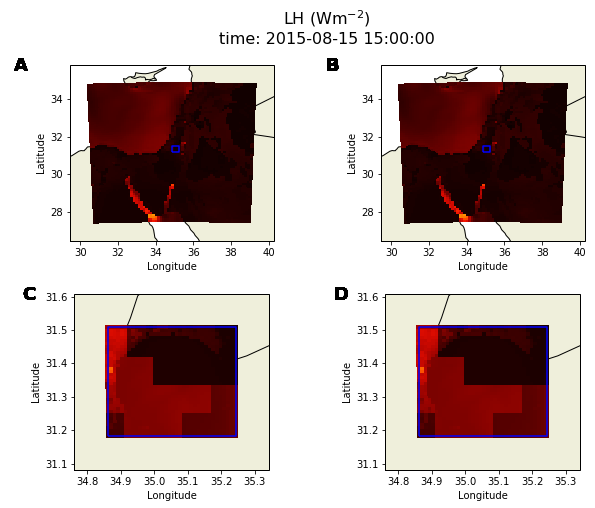
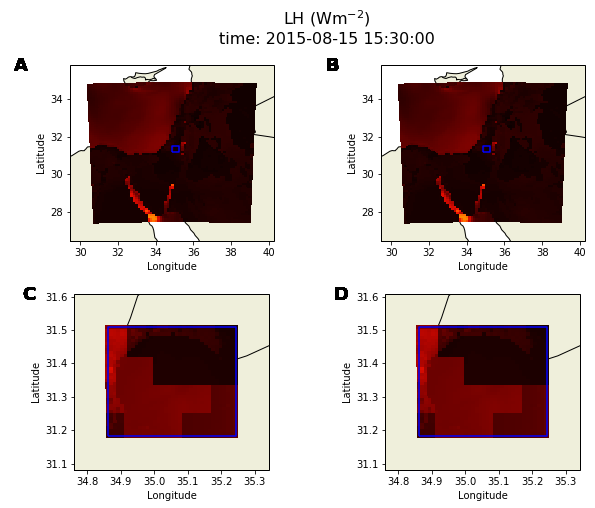
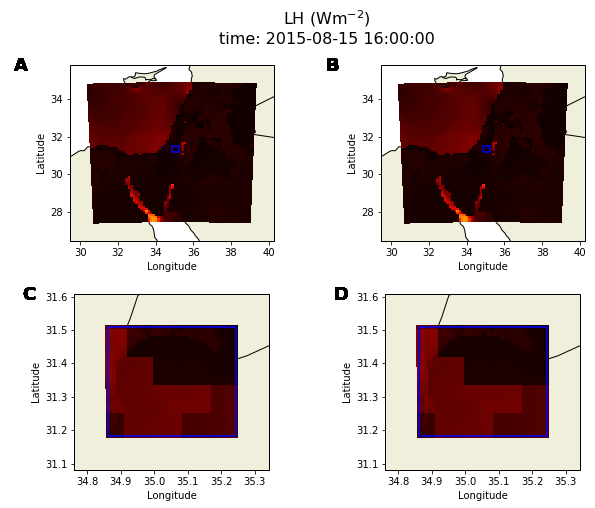
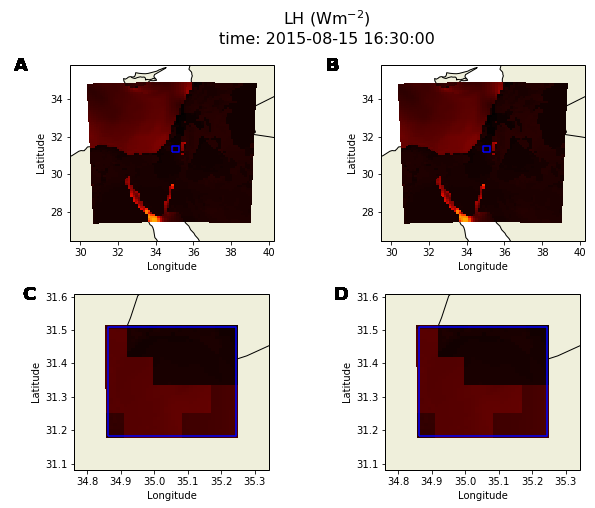
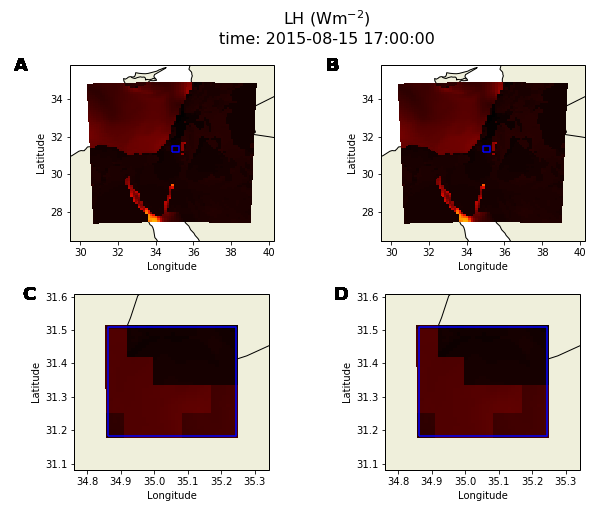
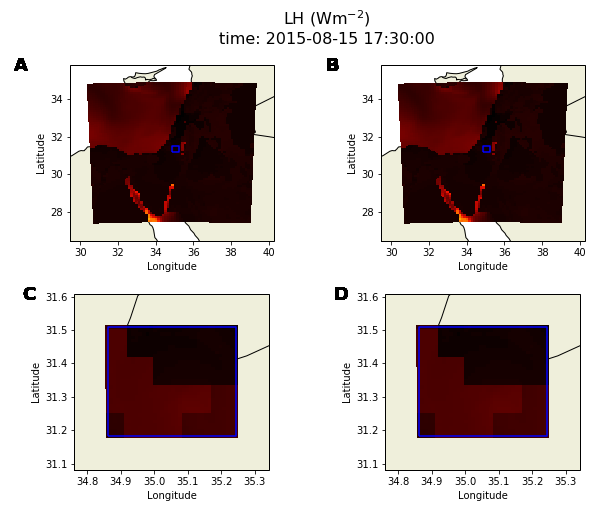
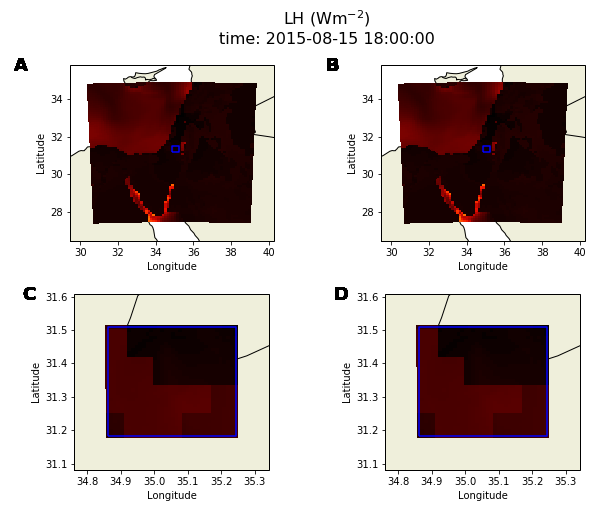
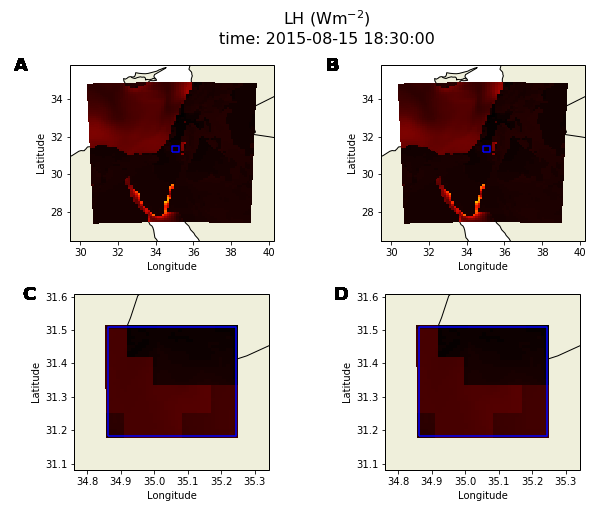
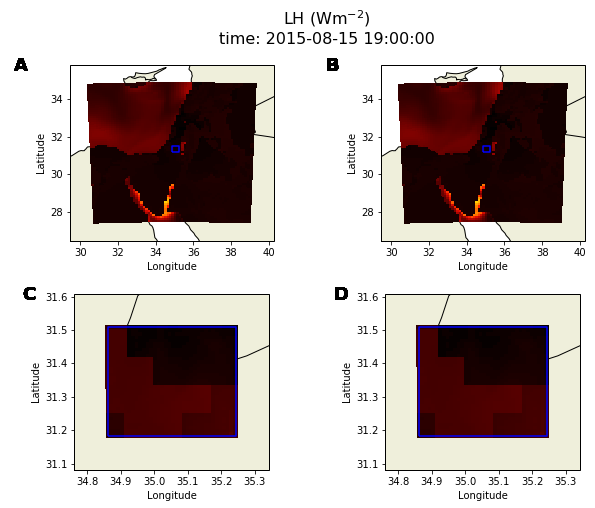
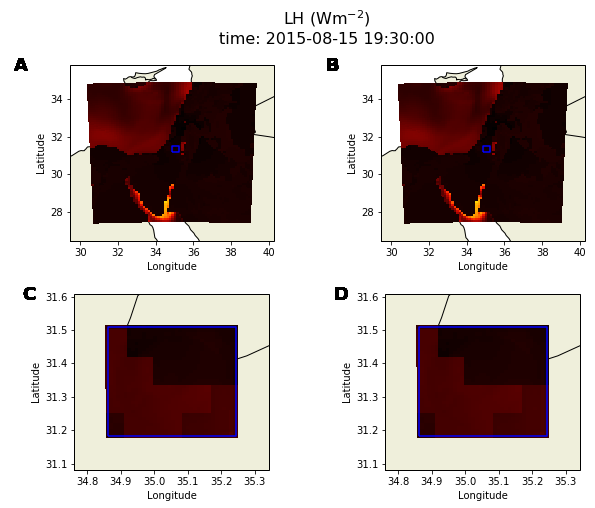
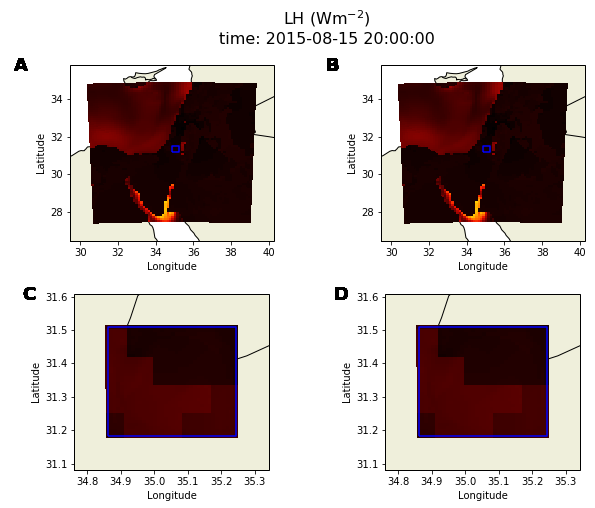
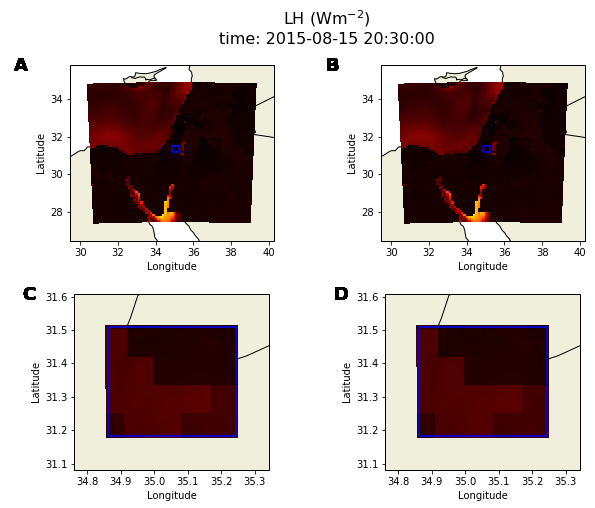
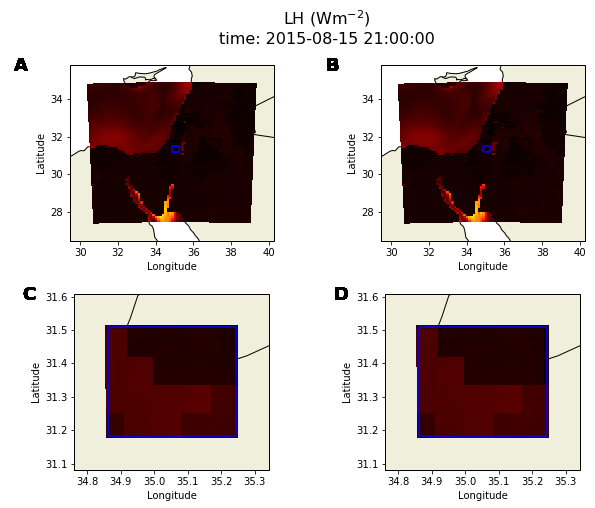
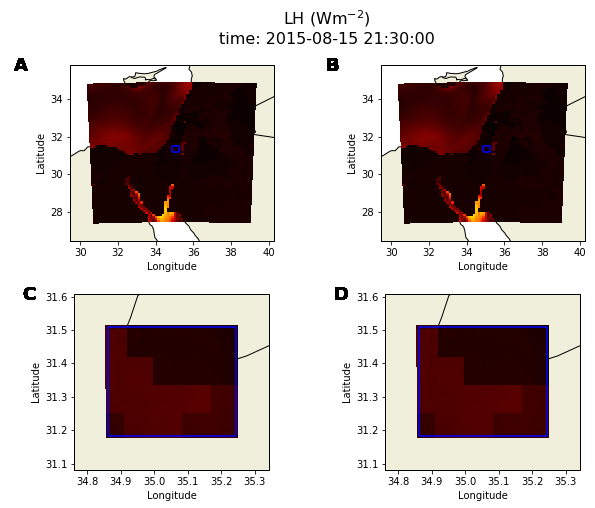
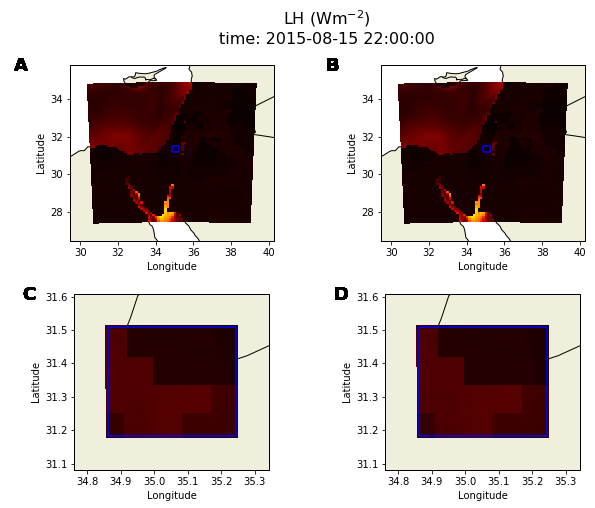
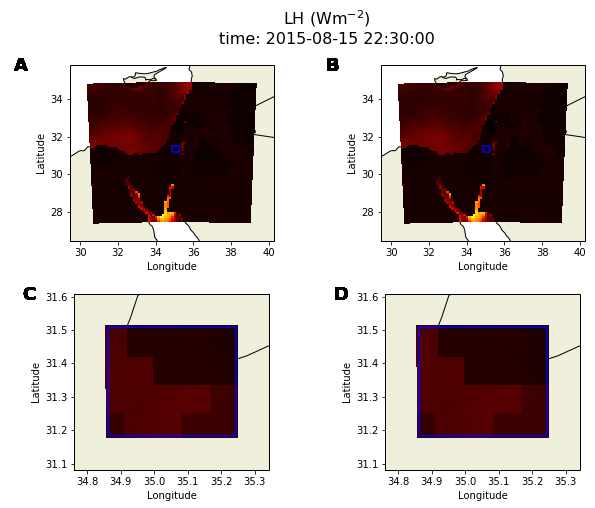
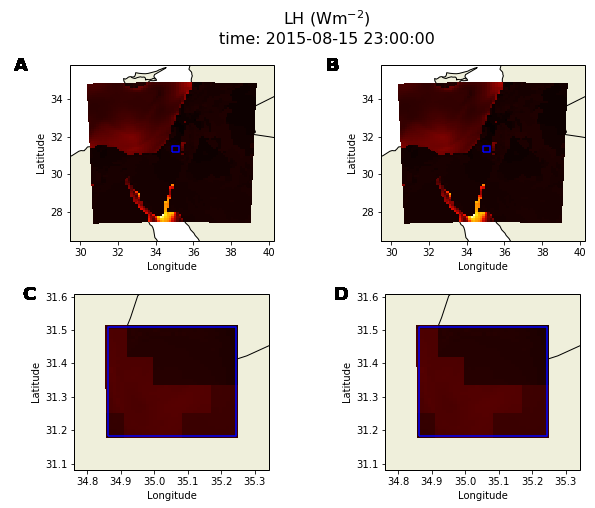
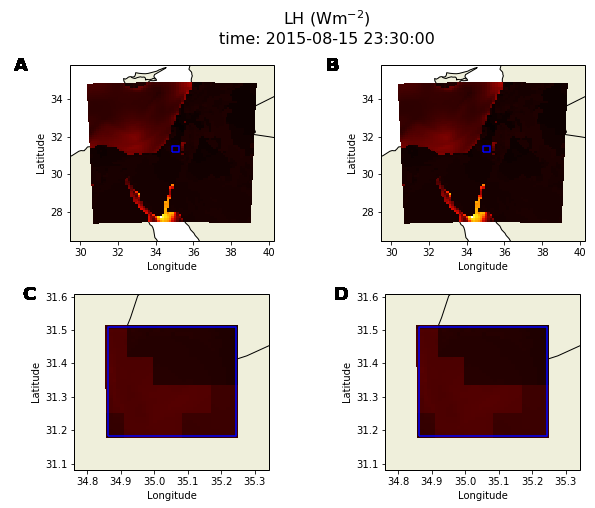

In [7]:
LHmaps

In [23]:
map_LH_ctl_d03 + map_LH_ytr_d03

:Layout
   .Control.D03 :Overlay
      .Land.I      :Feature   [Longitude,Latitude]
      .Ocean.I     :Feature   [Longitude,Latitude]
      .Coastline.I :Feature   [Longitude,Latitude]
      .Borders.I   :Feature   [Longitude,Latitude]
      .Control.D03 :HoloMap   [time]
         :QuadMesh   [lat,lon]   (LH)
      .Bounds.I    :Bounds   [x,y]
   .Yatir.D03   :Overlay
      .Land.I      :Feature   [Longitude,Latitude]
      .Ocean.I     :Feature   [Longitude,Latitude]
      .Coastline.I :Feature   [Longitude,Latitude]
      .Borders.I   :Feature   [Longitude,Latitude]
      .Yatir.D03   :HoloMap   [time]
         :QuadMesh   [lat,lon]   (LH)
      .Bounds.I    :Bounds   [x,y]